<a href="https://colab.research.google.com/github/newbie0309/DSCover-2022-2-Mini-Project/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import RegressorChain
from sklearn import multioutput
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
t = pd.read_csv('/content/drive/MyDrive/Capstone Design/planttest_2_1.txt', sep = '\t', header = 6)
t2 = pd.read_csv('/content/drive/MyDrive/Capstone Design/planttest_3_1.txt', sep = '\t', header = 6)

In [ ]:
t2 = t2.rename(columns = {'PP1TRCA1241 - SnapShot' : 'CV', 'PP1TRCA1242 - SnapShot' : 'MV', 'PP1HIC1146.OP - SnapShot' : 'DV01', 'PP1FRCA1203 - SnapShot' : 'DV02', 'PP1FRCA1201 - SnapShot' : 'DV03', 'PP1FRCA1233 - SnapShot' : 'DV04'})

In [ ]:
t2_temp = t2[['CV', 'MV', 'DV01', 'DV02', 'DV03', 'DV04']]

In [ ]:
t2_temp.head()

,CV,MV,DV01,DV02,DV03,DV04
0,68.868546,46.562851,59.000099,22980.89844,1.30240,315.020996
1,68.865097,46.561100,59.000099,22965.09961,1.30312,316.856995
2,68.855797,46.597401,59.000099,23026.59961,1.30524,312.532013
3,68.855301,46.590401,59.000099,22975.19922,1.29947,313.000000
4,68.850098,46.586498,59.000099,23047.90039,1.30328,314.226013


In [ ]:
t2_temp

,CV,MV,DV01,DV02,DV03,DV04
0,68.868546,46.562851,59.000099,22980.89844,1.302400,315.020996
1,68.865097,46.561100,59.000099,22965.09961,1.303120,316.856995
2,68.855797,46.597401,59.000099,23026.59961,1.305240,312.532013
3,68.855301,46.590401,59.000099,22975.19922,1.299470,313.000000
4,68.850098,46.586498,59.000099,23047.90039,1.303280,314.226013
...,...,...,...,...,...,...
51836,72.135399,46.502701,70.000000,24317.19922,0.654215,0.000000
51837,72.132401,46.468102,70.000000,24267.30078,0.655717,0.000000
51838,72.136200,46.479500,70.000000,24312.90039,0.655748,0.000000
51839,72.153397,46.462299,70.000000,24306.69922,0.657106,0.000000


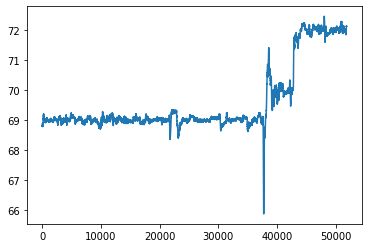

In [ ]:
plt.plot(t2_temp['CV'])

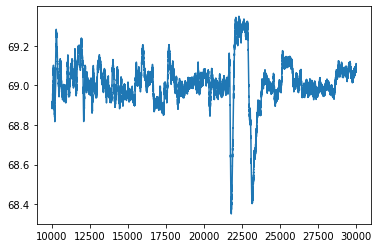

In [ ]:
plt.plot(t2_temp.loc[10000:30000,'CV'])

In [ ]:
a = pd.DataFrame(t2_temp.loc[10000:30000, 'CV'].values) 
b = pd.DataFrame(t2_temp.loc[9700:29700, 'MV'].values) #Delay time : 300s
c = pd.DataFrame(t2_temp.loc[7000:27000, 'DV01'].values) #Delay time : 3000s
d = pd.DataFrame(t2_temp.loc[8800:28800, 'DV02'].values) #Delay time : 1200s
e = pd.DataFrame(t2_temp.loc[7500:27500, 'DV03'].values) #Delay time : 2500s
f = pd.DataFrame(t2_temp.loc[8500:28500, 'DV04'].values) #Delay time : 1500s

In [ ]:
new = pd.concat([a,b,c,d,e,f], axis = 1, ignore_index=True)

In [ ]:
new.columns = t2_temp.columns

In [ ]:
new

,CV,MV,DV01,DV02,DV03,DV04
0,68.885498,46.314499,61.000099,23277.80078,1.321335,316.519989
1,68.884598,46.298599,61.000099,23307.40039,1.321610,320.765991
2,68.884048,46.308250,61.000099,23288.75000,1.319480,321.125977
3,68.883499,46.317902,61.000099,23270.09961,1.318310,321.485992
4,68.888397,46.351101,61.000099,23327.69922,1.320690,318.955994
...,...,...,...,...,...,...
19996,69.098602,43.269600,75.000000,23207.00000,1.492060,332.569000
19997,69.093697,43.279999,75.000000,23219.59961,1.490450,330.789001
19998,69.110497,43.284500,75.000000,23217.90039,1.491170,331.282989
19999,69.095802,43.274799,75.000000,23216.40039,1.491890,327.263000


In [ ]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(new, test_size = 0.2, shuffle = True, random_state = 123)
train, val = train_test_split(temp, test_size = 0.2, shuffle = True, random_state = 123)

In [ ]:
train_x = train.iloc[:, 1:]
train_y = train.iloc[:, 0]

val_x = val.iloc[:, 1:]
val_y = val.iloc[:, 0]

test_x = test.iloc[:, 1:]
test_y = test.iloc[:, 0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

train_x_sc = scaler.fit_transform(train_x)
train_y_sc = scaler1.fit_transform(train_y.values.reshape(-1,1))
val_x_sc = scaler.fit_transform(val_x)
val_y_sc = scaler1.fit_transform(val_y.values.reshape(-1,1))
test_x_sc = scaler.fit_transform(test_x)
test_y_sc = scaler1.fit_transform(test_y.values.reshape(-1,1))

In [ ]:
train_x = pd.DataFrame(train_x_sc)
train_y = pd.DataFrame(train_y_sc)
val_x = pd.DataFrame(val_x_sc)
val_y = pd.DataFrame(val_y_sc)
test_x = pd.DataFrame(test_x_sc)
test_y = pd.DataFrame(test_y_sc)

In [ ]:
#MSE, RMSE of validation data
etr = ExtraTreesRegressor()
etr.fit(train_x, train_y)
pred = etr.predict(val_x)

#inverse scaling in order to evaluate metrics
val_y_temp = pd.DataFrame(scaler1.inverse_transform(val_y))
pred_temp = pd.DataFrame(scaler1.inverse_transform(pred.reshape(-1,1)))

mse = mean_squared_error(val_y_temp, pred_temp)
rmse = np.sqrt(mse)
print(mse, rmse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.001832437020148834 0.04280697396626902


In [ ]:
#MSE, RMSE of test data
pred2 = etr.predict(test_x)

test_y_temp = pd.DataFrame(scaler1.inverse_transform(test_y))
pred2_temp = pd.DataFrame(scaler1.inverse_transform(pred2.reshape(-1,1)))

mse2 = mean_squared_error(test_y_temp, pred2_temp)
rmse2 = np.sqrt(mse2)
print(mse2, rmse2)

0.001818633900427262 0.042645444075859525


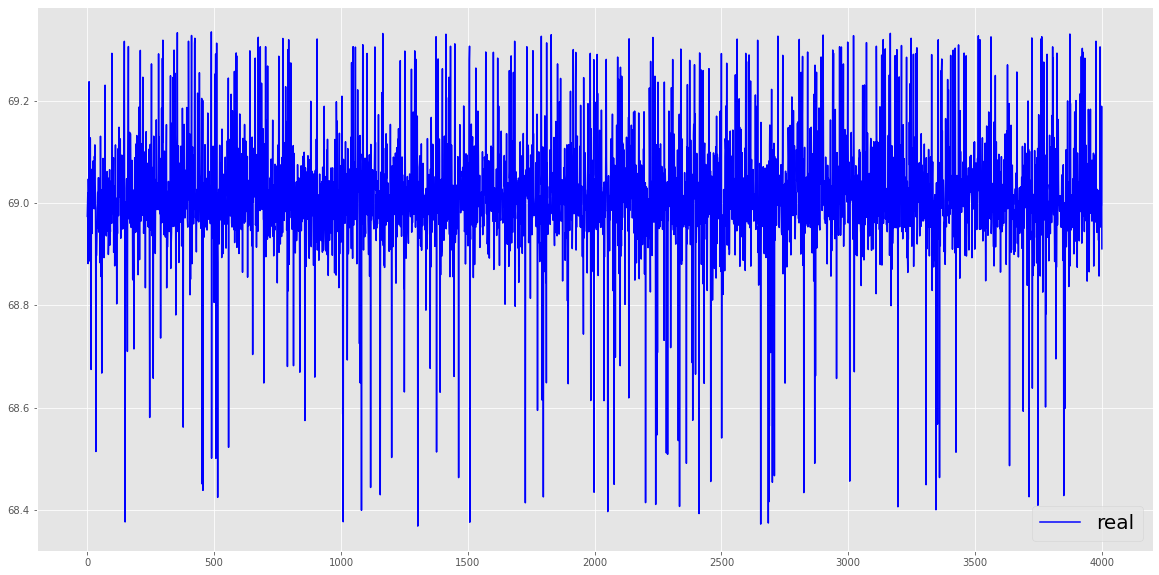

In [ ]:
#scaled 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
#plt.plot(pred2_temp.values, label = 'prediction')
plt.plot(test_y_temp.values, label = 'real', color = 'b')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
test_y

,0
0,0.626748
1,0.649953
2,0.674407
3,0.531231
4,0.702370
...,...
3996,0.646120
3997,0.640524
3998,0.649747
3999,0.849529


### scaling 후 진행하는 것이 더 정확한 것으로 나타났음. (y축 범위를 기준으로 했음)

## 여러가지 회귀 모델 시도

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
new2 = new.copy()

In [ ]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(new2, test_size = 0.2, shuffle = True, random_state = 123)
train, val = train_test_split(temp, test_size = 0.2, shuffle = True, random_state = 123)

train_x = train.iloc[:, 1:]
train_y = train.iloc[:, 0]
val_x = val.iloc[:, 1:]
val_y = val.iloc[:, 0]
test_x = test.iloc[:, 1:]
test_y = test.iloc[:, 0]

In [ ]:
#scaling module
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

train_x_sc = scaler.fit_transform(train_x)
train_y_sc = scaler1.fit_transform(train_y.values.reshape(-1,1))
val_x_sc = scaler.fit_transform(val_x)
val_y_sc = scaler1.fit_transform(val_y.values.reshape(-1,1))
test_x_sc = scaler.fit_transform(test_x)
test_y_sc = scaler1.fit_transform(test_y.values.reshape(-1,1))

train_x = pd.DataFrame(train_x_sc)
train_y = pd.DataFrame(train_y_sc)
val_x = pd.DataFrame(val_x_sc)
val_y = pd.DataFrame(val_y_sc)
test_x = pd.DataFrame(test_x_sc)
test_y = pd.DataFrame(test_y_sc)

In [ ]:
rf = DecisionTreeRegressor()
rf.fit(train_x, train_y)
pred = rf.predict(val_x)

#inverse transform to evaluate metrics
val_y_temp = pd.DataFrame(scaler1.inverse_transform(val_y))
pred_temp = pd.DataFrame(scaler1.inverse_transform(pred.reshape(-1,1)))
#검증 데이터의 MSE, RMSE
mse = mean_squared_error(val_y_temp, pred_temp)
rmse = np.sqrt(mse)
print(mse, rmse)

0.004394907085878312 0.06629409540734614


In [ ]:
#테스트 데이터의 MSE, RMSE
pred2 = rf.predict(test_x)
#inverse transform to evaluate metrics
test_y_temp = pd.DataFrame(scaler1.inverse_transform(test_y))
pred2_temp = pd.DataFrame(scaler1.inverse_transform(pred2.reshape(-1,1)))

mse = mean_squared_error(test_y_temp, pred2_temp)
rmse = np.sqrt(mse)
print(mse, rmse)

0.0042041755385791085 0.06483961396075016


In [ ]:
pred2 = pd.DataFrame(pred2_temp)
test_y = pd.DataFrame(test_y_temp)

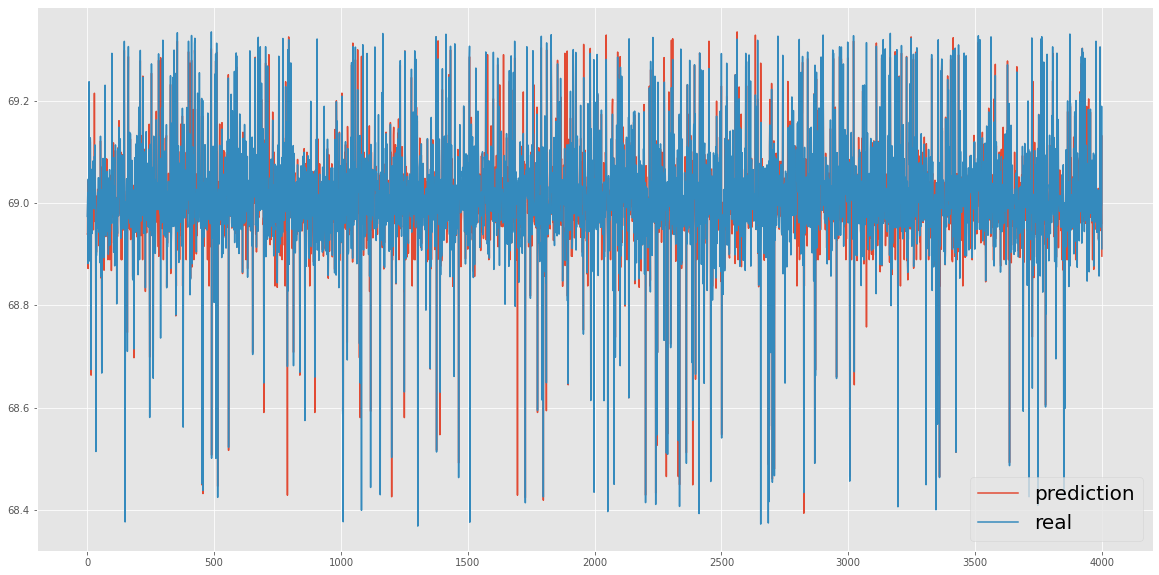

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(pred2.values, label = 'prediction')
plt.plot(test_y.values, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
mse = mean_squared_error(test_y, pred2)
rmse = np.sqrt(mse)
print(mse, rmse)

0.001818633900427262 0.042645444075859525
